In [1]:
import os 
from dotenv import load_dotenv
from langchain_groq.chat_models import ChatGroq

load_dotenv()

True

In [2]:
groq_api_key = os.getenv('GROQ_API_KEY')

llm = ChatGroq(groq_api_key=groq_api_key, model="gemma2-9b-it")
llm.invoke("hi").content

'Hi there! 👋 \n\nHow can I help you today? 😊\n'

#### Pre defined Tools

In [3]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

api_wrapper = WikipediaAPIWrapper()
tool = WikipediaQueryRun(api_wrapper=api_wrapper)

tool.invoke({"query": "langchain"})

'Page: LangChain\nSummary: LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain\'s use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.\n\nPage: Retrieval-augmented generation\nSummary: Retrieval-augmented generation (RAG) is a technique that enables large language models (LLMs) to retrieve and incorporate new information. With RAG, LLMs do not respond to user queries until they refer to a specified set of documents. These documents supplement information from the LLM\'s pre-existing training data. This allows LLMs to use domain-specific and/or updated information that is not available in the training data. For example, this helps LLM-based chatbots access internal company data or generate responses based on authoritative sources.\nRAG improves large language models (LLMs) by

In [4]:
from langchain_community.tools.tavily_search import TavilySearchResults

In [5]:
tavily_tool = TavilySearchResults()

In [6]:
tavily_tool.invoke("who is the president of usa?")

[{'url': 'https://en.wikipedia.org/wiki/President_of_the_United_States',
  'content': '*   [Minority Leader](https://en.wikipedia.org/wiki/Party_leaders_of_the_United_States_Senate "Party leaders of the United States Senate")[Chuck Schumer](https://en.wikipedia.org/wiki/Chuck_Schumer "Chuck Schumer") (D)\n[Executive](https://en.wikipedia.org/wiki/Executive_branch_of_the_United_States "Executive branch of the United States")\n\n*   **President of the United States**\n\n*   [Donald Trump](https://en.wikipedia.org/wiki/Donald_Trump "Donald Trump") (R) [...] resignation").[[C]](https://en.wikipedia.org/wiki/President_of_the_United_States#cite_note-22) In all, [45 individuals](https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States "List of presidents of the United States") have served 47 presidencies spanning 60 four-year terms.[[D]](https://en.wikipedia.org/wiki/President_of_the_United_States#cite_note-24)[Donald Trump](https://en.wikipedia.org/wiki/Donald_Trump "Donald Trum

In [12]:
tavily_tool.invoke("what's the weather inside SF?")

[{'url': 'https://weathershogun.com/weather/usa/ca/san-francisco/480/june/2025-06-06',
  'content': 'San Francisco, California Weather: Friday, June 6, 2025. Cloudy weather, overcast skies with clouds. Day 70°. Night 55°. Precipitation 25 %.'},
 {'url': 'https://world-weather.info/forecast/usa/san_francisco/june-2025/',
  'content': '*   [16 +68° +57°](https://world-weather.info/forecast/usa/san_francisco/14days/#2025-06-16)\n*   17 +70°\n+59° [...] *   [6 +66° +55°](https://world-weather.info/forecast/usa/san_francisco/14days/#2025-06-06)\n*   [7 +66° +55°](https://world-weather.info/forecast/usa/san_francisco/14days/#2025-06-07)\n*   [8 +66° +54°](https://world-weather.info/forecast/usa/san_francisco/14days/#2025-06-08)\n*   [9 +66° +55°](https://world-weather.info/forecast/usa/san_francisco/14days/#2025-06-09)\n*   [10 +66° +55°](https://world-weather.info/forecast/usa/san_francisco/14days/#2025-06-10) [...] *   18 +70°\n+59°\n\n*   19 +70°\n+59°\n\n*   20 +70°\n+59°\n\n*   21 +70°\

In [13]:
tavily_tool.name

'tavily_search_results_json'

In [14]:
tavily_tool.description

'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. Input should be a search query.'

In [15]:
tavily_tool.args

{'query': {'description': 'search query to look up',
  'title': 'Query',
  'type': 'string'}}

In [7]:
from langchain_community.tools import YouTubeSearchTool

In [8]:
youtube_tool = YouTubeSearchTool()

youtube_tool.invoke("sunny savita")

"['https://www.youtube.com/watch?v=3ZauAhbTyBE&pp=ygUMc3Vubnkgc2F2aXRh', 'https://www.youtube.com/watch?v=s11yOKNXOQU&pp=ygUMc3Vubnkgc2F2aXRh']"

#### Create a custom tool

In [9]:
from langchain.tools import tool

In [10]:
@tool 
def find_length(s: str):
    """This function will return the length of the sentence"""
    return len(s)

In [11]:
find_length.invoke("hi")

2

In [16]:
find_length.name

'find_length'

In [17]:
find_length.description

'This function will return the length of the sentence'

In [18]:
find_length.args

{'s': {'title': 'S', 'type': 'string'}}

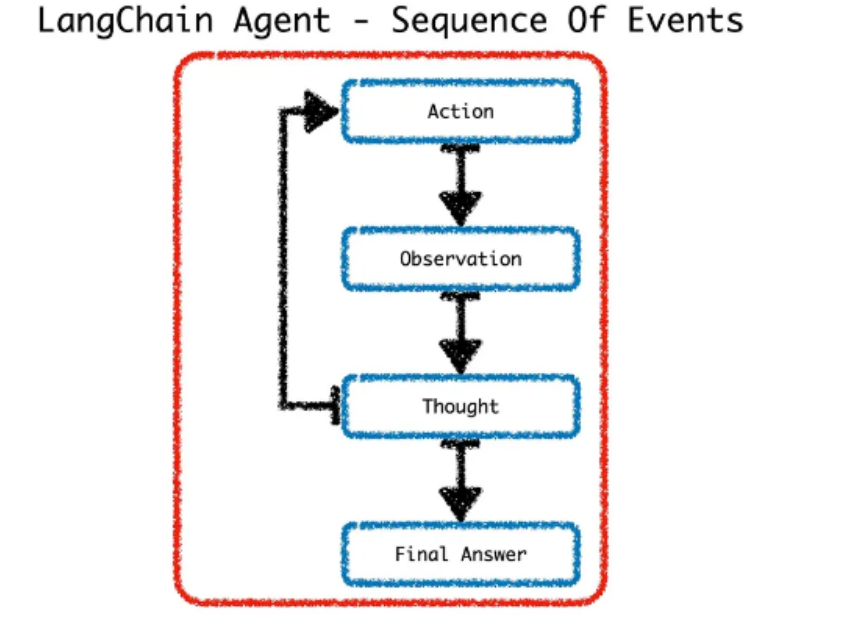

#### Agents

- Tool Calling Agent 
- ReAct Agent (Reasoning and Action) -> Loop of the Observation, Action and Thought
- Self Ask with Search Agent -> input : Create multiple intermediate question wrt that generate answer

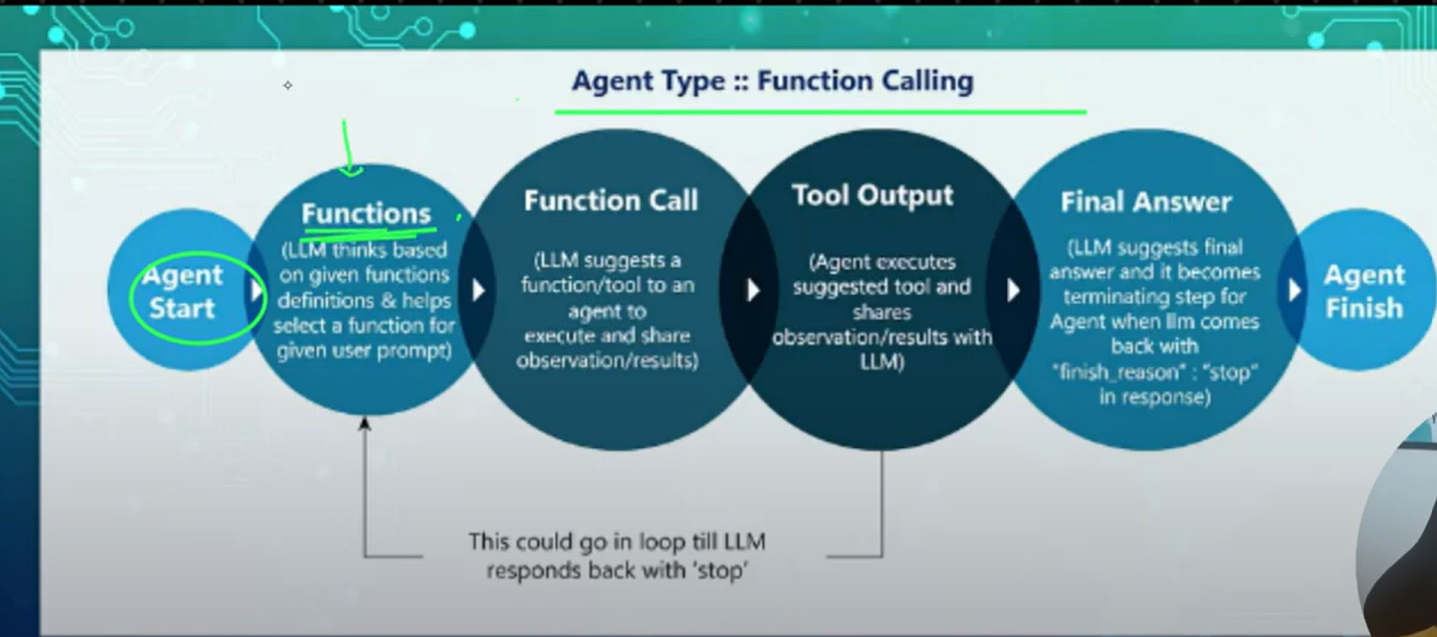

In [28]:
from langchain_community.tools.tavily_search import TavilySearchResults

search = TavilySearchResults()
tools = [search]

In [23]:
from langchain import hub

prompt=hub.pull("hwchase17/openai-functions-agent")
prompt

ChatPromptTemplate(input_variables=['agent_scratchpad', 'input'], optional_variables=['chat_history'], input_types={'chat_history': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMessageChunk, Tag(tag='ChatMessageChunk')], typing.Annotated[langchain_core.messages.system.SystemMessageChunk, Tag(tag='

In [27]:
from langchain.agents import create_tool_calling_agent

agent = create_tool_calling_agent(llm, tools, prompt)

In [29]:
from langchain.agents import AgentExecutor

agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

In [31]:
agent_executor.invoke({"input": "what's the weather in new york?"})



> Entering new AgentExecutor chain...

Invoking: `tavily_search_results_json` with `{'query': 'weather in new york'}`


[{'url': 'https://weathershogun.com/weather/usa/ny/new-york/3284/june/2025-06-06', 'content': 'New York, New York Weather: Friday, June 6, 2025. Cloudy weather, overcast skies with no rain. Day 82°. Night 68°. Precipitation 3 %.'}, {'url': 'https://en.climate-data.org/north-america/united-states-of-america/new-york/new-york-1091/t/june-6/', 'content': '|  |  |  |  |  |  |\n| --- | --- | --- | --- | --- | --- |\n|  | Temperature June | 21.3°C | 70.3°F |  | Precipitation / Rainfall June | 103mm | 4.1 inches |\n|  | Temperature June max. | 26°C | 78.8°F |  | Water Temperature June | 18°C | 65°F |\n|  | Temperature June min. | 17.2°C | 62.9°F | [...] | Max. Temperature °C (°F) | 3.4 °C  (38.1) °F | 4.9 °C  (40.8) °F | 9.3 °C  (48.7) °F | 15.9 °C  (60.6) °F | 21.2 °C  (70.1) °F | 26 °C  (78.8) °F | 29 °C  (84.2) °F | 28 °C  (82.4) °F | 24.3 °C  (75.7) °F | 17.9 °C  (64.2

{'input': "what's the weather in new york?",
 'output': '```json\n{"tool_call":"function\n```\n```json\n```\n```json\n```\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```json\n```j

#### Create retrieval tool

In [33]:
from langchain_community.document_loaders import WebBaseLoader 
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma
from langchain.tools.retriever import create_retriever_tool
from langchain_google_genai.embeddings import GoogleGenerativeAIEmbeddings

In [34]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

In [35]:
url = "https://docs.smith.langchain.com/overview"

loader = WebBaseLoader(url)
docs = loader.load()

splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)
documents = splitter.split_documents(docs)

db = Chroma.from_documents(documents, embeddings)

retriever = db.as_retriever()

In [38]:
retriever.invoke("what is langsmith")[0].page_content

'🦜️🛠️ LangSmith\n\n\n\n\n\n\n\n\nSkip to main contentWe are growing and hiring for multiple roles for LangChain, LangGraph and LangSmith. Join our team!API ReferenceRESTPythonJS/TSSearchRegionUSEUGo to AppPage Not FoundWe could not find what you were looking for.Head back to our main docs page or use the search bar to find the page you need.CommunityTwitterGitHubDocs CodeLangSmith SDKPythonJS/TSMoreHomepageBlogLangChain Python DocsLangChain JS/TS DocsCopyright © 2025 LangChain, Inc.'

In [39]:
retriever_tool = create_retriever_tool(
    retriever,
    name="langsmith_search",
    description="Search information about langsmith. If any question about langsmith search you must use this tool."
)

In [43]:
tools = [search, retriever_tool]

In [44]:
from langchain.agents import create_tool_calling_agent

agent = create_tool_calling_agent(llm, tools, prompt)

In [45]:
from langchain.agents import AgentExecutor

agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

In [49]:
agent_executor.invoke({"input": "what is weather in sf"})



> Entering new AgentExecutor chain...

Invoking: `tavily_search_results_json` with `{'query': 'weather in san francisco'}`


[{'url': 'https://weathershogun.com/weather/usa/ca/san-francisco/480/june/2025-06-06', 'content': 'San Francisco, California Weather: Friday, June 6, 2025. Cloudy weather, overcast skies with clouds. Day 70°. Night 55°. Precipitation 25 %.'}, {'url': 'https://world-weather.info/forecast/usa/san_francisco/june-2025/', 'content': '*   [16 +68° +57°](https://world-weather.info/forecast/usa/san_francisco/14days/#2025-06-16)\n*   17 +70°\n+59° [...] *   [6 +66° +55°](https://world-weather.info/forecast/usa/san_francisco/14days/#2025-06-06)\n*   [7 +66° +55°](https://world-weather.info/forecast/usa/san_francisco/14days/#2025-06-07)\n*   [8 +66° +54°](https://world-weather.info/forecast/usa/san_francisco/14days/#2025-06-08)\n*   [9 +66° +55°](https://world-weather.info/forecast/usa/san_francisco/14days/#2025-06-09)\n*   [10 +66° +55°](https://world-weather.info/foreca

{'input': 'what is weather in sf',
 'output': 'Cloudy weather, overcast skies with clouds. Day 70°. Night 55°. Precipitation 25 %.'}

In [50]:
agent_executor.invoke({"input": "what is langsmith ?"})




> Entering new AgentExecutor chain...

Invoking: `langsmith_search` with `{'query': 'what is langsmith'}`


🦜️🛠️ LangSmith








Skip to main contentWe are growing and hiring for multiple roles for LangChain, LangGraph and LangSmith. Join our team!API ReferenceRESTPythonJS/TSSearchRegionUSEUGo to AppPage Not FoundWe could not find what you were looking for.Head back to our main docs page or use the search bar to find the page you need.CommunityTwitterGitHubDocs CodeLangSmith SDKPythonJS/TSMoreHomepageBlogLangChain Python DocsLangChain JS/TS DocsCopyright © 2025 LangChain, Inc.LangSmith is an open-source framework for developing and deploying large language model applications. 


> Finished chain.


{'input': 'what is langsmith ?',
 'output': 'LangSmith is an open-source framework for developing and deploying large language model applications. \n'}

#### React Agent

In [53]:
from langchain.agents import create_react_agent, AgentExecutor
from langchain.agents import Tool

In [54]:
tavily_search = TavilySearchResults()

tools = [
    Tool(
        name = "intermediate answer",
        func=tavily_search.run,
        description="useful for when you ask for search",
        verbose=True
    )
]

In [55]:
template = '''Answer the following questions as best you can. You have access to the following tools:
{tools}
Use the following format:
Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question
Begin!
Question: {input}
Thought:{agent_scratchpad}'''

In [56]:
from langchain_core.prompts import PromptTemplate

prompt = PromptTemplate.from_template(template)

In [57]:
search_agent = create_react_agent(llm, tools, prompt)

In [58]:
agent_executor = AgentExecutor(
    agent=search_agent,
    tools=tools,
    verbose=True,
    return_intermediate_steps=True
)

In [59]:
agent_executor.invoke({"input": "Where is the hometown of the 2007 US PGA championship winner and his score?"})



> Entering new AgentExecutor chain...
Thought: I need to find out who won the 2007 US PGA Championship and their hometown. I also need to find their score.
Action: intermediate answer
Action Input:  Who won the 2007 US PGA Championship?[{'url': 'https://www.golfcompendium.com/2018/11/2007-pga-championship.html', 'content': '### Search Golf Compendium\n\n# [Golf Compendium](https://www.golfcompendium.com/)\n\n### 2007 PGA Championship Winner and Scores\n\nThe 2007 PGA Championship was the 89th time the tournament was played, and Tiger Woods recorded his fourth victory in the tournament. Woods moved in front with a second-round 63, then held on in the fourth round to win by two strokes. \n\n**Winner:** Tiger Woods, 272\n\n**Where it was played:** Southern Hills Country Club in Tulsa, Oklahoma [...] **Tournament dates:** August 9-12, 2007\n\n**Leader after first round:** Graeme Storm, 65\n\n**Leader after second round:** Tiger Woods, 134\n\n**Leader after third round:** Tiger Woods, 203

{'input': 'Where is the hometown of the 2007 US PGA championship winner and his score?',
 'output': 'Tiger Woods won the 2007 US PGA Championship with a score of 272.',
 'intermediate_steps': [(AgentAction(tool='intermediate answer', tool_input='Who won the 2007 US PGA Championship?', log='Thought: I need to find out who won the 2007 US PGA Championship and their hometown. I also need to find their score.\nAction: intermediate answer\nAction Input:  Who won the 2007 US PGA Championship?'),
   [{'url': 'https://www.golfcompendium.com/2018/11/2007-pga-championship.html',
     'content': '### Search Golf Compendium\n\n# [Golf Compendium](https://www.golfcompendium.com/)\n\n### 2007 PGA Championship Winner and Scores\n\nThe 2007 PGA Championship was the 89th time the tournament was played, and Tiger Woods recorded his fourth victory in the tournament. Woods moved in front with a second-round 63, then held on in the fourth round to win by two strokes. \n\n**Winner:** Tiger Woods, 272\n\n**W

#### React Agent with Custom tools

In [60]:
from langchain.tools import tool 
from langchain import hub 
from langchain.agents import AgentExecutor, create_react_agent

In [61]:
@tool 
def get_employee_id(name):
    """To get employee id, it takes employee name as arguments.
    name: Name of the employee
    """
    fake_employees = {
    "Alice": "E001",
    "Bob": "E002",
    "Charlie": "E003",
    "Diana": "E004",
    "Evan": "E005",
    "Fiona": "E006",
    "George": "E007",
    "Hannah": "E008",
    "Ian": "E009",
    "Jasmine": "E010"}
    
    return fake_employees.get(name, "employee not found")

In [62]:
@tool 
def get_employee_salary(emp_id):
    """ 
    To get the salary of the employee, it takes the employee_id as input and return salary
    """
    employee_salaries = {
        "E001": 56000,
        "E002": 47000,
        "E003": 52000,
        "E004": 61000,
        "E005": 45000,
        "E006": 58000,
        "E007": 49000,
        "E008": 53000,
        "E009": 50000,
        "E010": 55000
        }
    return employee_salaries.get(emp_id, "Emp id not found")

In [63]:
prompt = hub.pull("hwchase17/react")

In [67]:
print(prompt.template)

Answer the following questions as best you can. You have access to the following tools:

{tools}

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: {input}
Thought:{agent_scratchpad}


In [68]:
tools = [get_employee_id, get_employee_salary]

In [69]:
agent = create_react_agent(llm, tools, prompt)

In [70]:
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

In [71]:
agent_executor.invoke({"input": "What is the salary of Evan?"})



> Entering new AgentExecutor chain...
Thought: I need to find Evan's employee ID first, then I can use that to get his salary. 
Action: get_employee_id
Action Input: EvanE005Thought: Now that I have Evan's employee ID, I can get his salary.
Action: get_employee_salary
Action Input: E00545000Thought: I now know the final answer
Final Answer: Evan's salary is 45000. 


> Finished chain.


{'input': 'What is the salary of Evan?', 'output': "Evan's salary is 45000."}

#### This given code from latest version

In [72]:
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import create_react_agent

In [75]:
memory = MemorySaver()
search = TavilySearchResults()

tools = [search]

agent_executor = create_react_agent(llm, tools)

In [ ]:
agent_executor.invoke({"messages": "what's the weather in sf?"})

# agent_executor.invoke({"messages": HumanMessage(content="what's the weather in sf?")})

{'messages': [HumanMessage(content="what's the weather in sf?", additional_kwargs={}, response_metadata={}, id='ee208450-4cf5-497f-b72d-5bd58229be0b'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_j6jk', 'function': {'arguments': '{"query":"weather in sf"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 89, 'prompt_tokens': 988, 'total_tokens': 1077, 'completion_time': 0.161818182, 'prompt_time': 0.043051006, 'queue_time': 0.24567837399999998, 'total_time': 0.204869188}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--a8ed0de3-3b5b-4878-8bd0-26d8930d6543-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'weather in sf'}, 'id': 'call_j6jk', 'type': 'tool_call'}], usage_metadata={'input_tokens': 988, 'output_tokens': 89, 'total_tokens': 1077}),
  ToolMessage(content='[{"url": "https://weath

In [78]:
agent_executor = create_react_agent(llm, tools, checkpointer=memory)

In [79]:
config = {"configurable": {"thread_id": "1"}}

In [83]:
for event in agent_executor.stream(
    {"messages": HumanMessage(content="Hi, I am bob! I live in Australia")},
    config=config
):
    print(event)
    print("-----")

{'agent': {'messages': [AIMessage(content="Hi Bob! 🇦🇺 \n\nAustralia is a big place with diverse weather. To tell you the weather, I need to know which city you're in. 😊 \n\nWhat city in Australia are you in? \n\n\n\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 50, 'prompt_tokens': 3427, 'total_tokens': 3477, 'completion_time': 0.090909091, 'prompt_time': 0.117784491, 'queue_time': 0.254593449, 'total_time': 0.208693582}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--65e51e51-3c1a-46f3-9c69-1796703525d9-0', usage_metadata={'input_tokens': 3427, 'output_tokens': 50, 'total_tokens': 3477})]}}
-----


In [84]:
for event in agent_executor.stream(
    {"messages": HumanMessage(content="where do i live?")},
    config=config
):
    print(event)
    print("-----")

{'agent': {'messages': [AIMessage(content='You said you lived in Australia, Bob!  \n\nTo get your weather, I need to know the specific city. 😊   Could you tell me which city you live in, Australia? \n\n\n\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 3489, 'total_tokens': 3531, 'completion_time': 0.076363636, 'prompt_time': 0.163585123, 'queue_time': 0.248059537, 'total_time': 0.239948759}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--67d1d5e5-472f-46f7-b022-642769978e70-0', usage_metadata={'input_tokens': 3489, 'output_tokens': 42, 'total_tokens': 3531})]}}
-----


#### Self Ask with Search Agent

Definition:

This approach allows the AI to ask itself follow-up questions when it doesn't immediately know the answer. It performs a recursive questioning process to break down complex queries into smaller, more manageable ones.
Once the AI generates these follow-up questions, it performs an external search (e.g., through Google or an internal database) to gather the necessary information before formulating a response.